In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [2]:
df=pd.read_csv("kindle_dataset - Sheet1.tsv", delimiter='\t')

In [4]:
df.sample(10)

,reviewText,rating
11102,I couldn't put the story down. It was funny an...,5
8353,This book was well written but while the plot ...,3
11776,if i wanted crappy stories and even crappier p...,1
5002,"I have really enjoyed this book, and I can. no...",5
402,I'm glad this was free. I've been curious abou...,1
9850,"Fascinating to read this true story of Alma, t...",5
2254,Lovely ....Didn't expect such a punch from suc...,4
7848,This is a relatively short book and I think th...,4
3543,I just got a Kindle and this is one of the fir...,5
2554,"All Lycan's EveCallie a 40 year old divorced, ...",4


In [8]:
#Truncating characters in review

def count_characters(text):
    return len(text)

df['character_count'] = df['reviewText'].apply(count_characters)
print(df[['reviewText', 'character_count']])

                                              reviewText  character_count
0      This book was the very first bookmobile book I...              298
1      When I read the description for this book, I c...              650
2      I just had to edit this review. This book is a...              650
3      I don't normally buy 'mystery' novels because ...              365
4      This isn't the kind of book I normally read, a...              389
...                                                  ...              ...
11995  Had to read certain passages twice--typos. Wis...              146
11996  Not what i expected. yet a very interesting bo...              140
11997  Dragon Knights is a world where Knights ride d...              337
11998  Since this story is very short, it's hard to s...              288
11999  from 1922 an amazing collection of info on sym...              213

[12000 rows x 2 columns]


In [14]:
max_len=650
df['reviewText']=df['reviewText'].apply(lambda x: x[:max_len])

In [12]:
df.to_csv("truncated_dataset", index=False)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewText       12000 non-null  object
 1   rating           12000 non-null  int64 
 2   character_count  12000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 281.4+ KB


In [23]:
df=df.drop('character_count',axis=1)

In [20]:
#Changing ratings into Positive, Negative and Neutral Sentiments

df2= pd.DataFrame({'rating': [1,2,3,4,5]})
rating_map={1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'}

In [21]:
df['rating']=df['rating'].replace(rating_map)

In [24]:
df.sample(15)

,reviewText,rating
4267,My 6 & 8 year old boy and girl did not like th...,Negative
2193,"Sorry, this book is not for me , I find his/he...",Negative
9206,I really liked this book. the story was well t...,Positive
2780,I would recommend if you are trying to tie kno...,Positive
6931,"THE BLUE MUSTANG is not a car, and the title p...",Neutral
2672,This book needs serious editing. There is too ...,Negative
11024,This is a small easy to carry charger for the ...,Positive
590,The title of this book is so appropriate. Love...,Positive
2737,I'm glad this was a freebie. I understand it w...,Negative
7669,"Sex was boring, and the guys chasing her only ...",Negative


In [25]:
df=df.rename(columns={'rating': 'Sentiment'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  12000 non-null  object
 1   Sentiment   12000 non-null  object
dtypes: object(2)
memory usage: 187.6+ KB


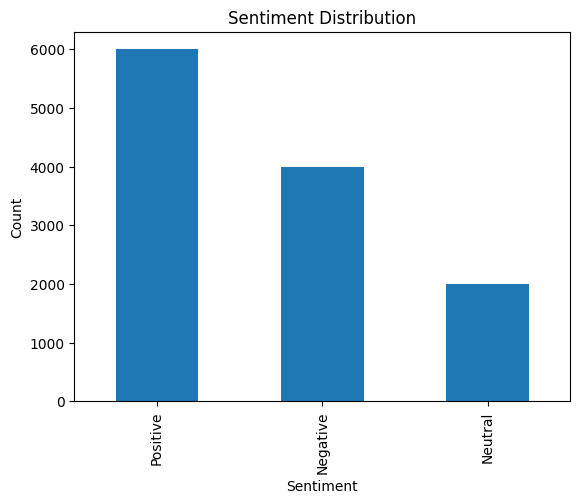

In [31]:
#Checking distribution

import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()

# Bar plot of sentiment distribution
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [45]:
#Performing Oversampling

from imblearn.over_sampling import RandomOverSampler

X=df
y=df['Sentiment']
# Create an instance of the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto')

# Fit and transform your data to perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df = X_resampled
df['y'] = y_resampled

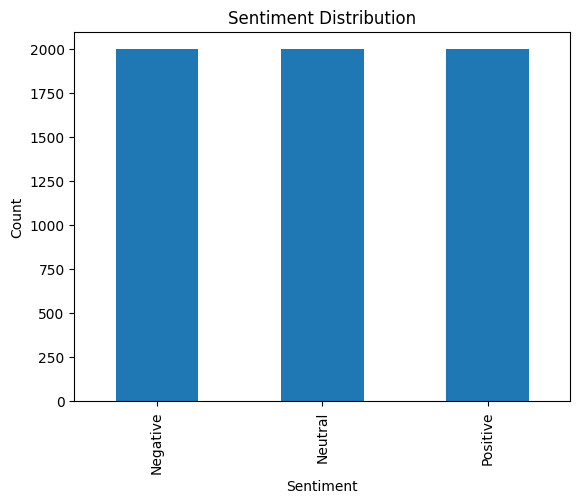

In [50]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [51]:
df.to_csv("final_dataset", index=False)